Amanda's notes: Need to increase limit for pulling 311 data when pulling total complaints!

In [2]:
# Install libraries
!pip install geodatasets

# Import libraries
from datetime import datetime
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Download the 311 complaints about syringes
syringe_complaints = pd.read_csv('https://data.cityofnewyork.us/resource/erm2-nwe9.csv?descriptor=Syringes&$limit=50000')
syringe_complaints.head(2)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,64490795,2025-03-28T14:34:56.000,NaN,DSNY,Department of Sanitation,Dirty Condition,Syringes,Street,10128.0,EAST 87 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,64493173,2025-03-28T12:08:17.000,NaN,DSNY,Department of Sanitation,Dirty Condition,Syringes,Traffic Island or Median,10458.0,2452 WASHINGTON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.858815,-73.890232,"\n, \n(40.85881489042382, -73.89023217211052)"


In [ ]:
# Examine the data types
syringe_complaints.dtypes

,0
unique_key,int64
created_date,object
closed_date,object
agency,object
agency_name,object
complaint_type,object
descriptor,object
location_type,object
incident_zip,float64
incident_address,object


In [ ]:
# Convert created_date from an object to a date
syringe_complaints['created_date'] = pd.to_datetime(syringe_complaints['created_date'])

In [ ]:
# Extract month and year from created_date
syringe_complaints['created_month'] = syringe_complaints['created_date'].dt.month
syringe_complaints['created_year'] = syringe_complaints['created_date'].dt.year

In [ ]:
# Look for missing values
syringe_complaints.isna().sum()

,0
unique_key,0
created_date,0
closed_date,18
agency,0
agency_name,0
complaint_type,0
descriptor,0
location_type,0
incident_zip,1
incident_address,1


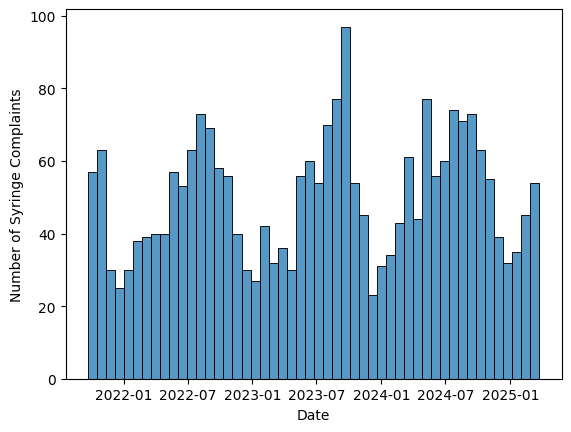

In [ ]:
# Make a plot to show the frequency of syringe complaints
ax = sns.histplot(data=syringe_complaints['created_date'], bins = 50)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Syringe Complaints')
plt.show()

Interesting finding: syringe complaints appear to peak at similar times each year!

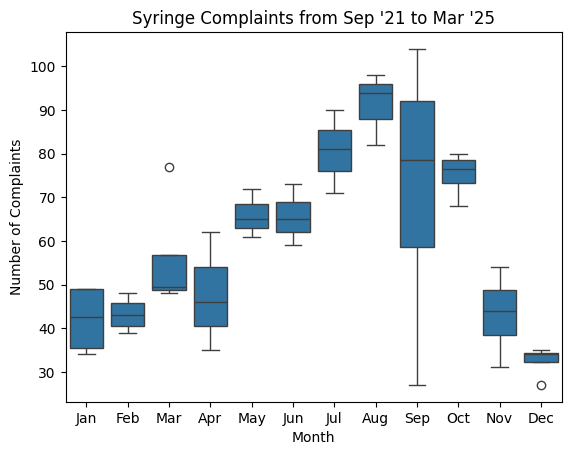

In [ ]:
# Make a boxplot to show the number of syringe complaints each month
ax = sns.boxplot(data = syringe_complaints.groupby(['created_year', 'created_month'])['created_date'].agg(complaint_count = 'count').reset_index(),
                 x = 'created_month',
                 y = 'complaint_count')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Complaints')
plt.title('Syringe Complaints from Sep \'21 to Mar \'25')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

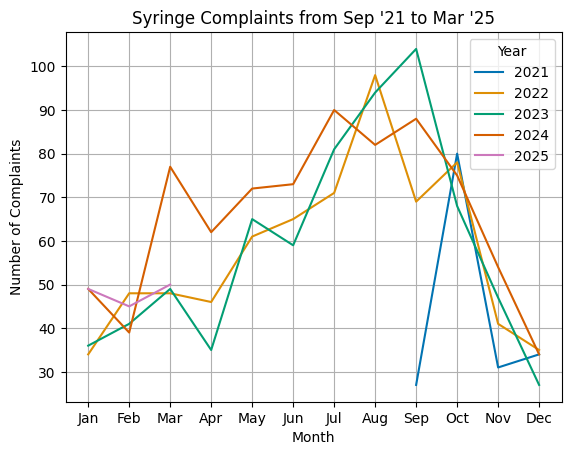

In [ ]:
# Make a lineplot of the number of syringe complaints each month, with a different line pear year
ax = sns.lineplot(data = syringe_complaints.groupby(['created_year', 'created_month'])['created_date'].agg(complaint_count = 'count').reset_index(),
                  x = 'created_month',
                  y = 'complaint_count',
                  hue = 'created_year',
                  palette = 'colorblind')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.title('Syringe Complaints from Sep \'21 to Mar \'25')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [ ]:
# Download the sharps dropoff site data
dropoff_sites = pd.read_csv('https://data.cityofnewyork.us/resource/edk2-vkjh.csv')
dropoff_sites.head(2)

,borough,ntaname,site_type,sitename,zipcode,phonenum,days_hours,address,borocd,notes,...,councildist,senate_district,_congress_district,assembly_district,police_precints,bbl,bin,latitude,longitude,point
0,Bronx,Norwood,SYRINGE/SHARPS Drop-off,North Central Bronx Hospital,10467,718-918-5000,24/7,"3424 Kossuth Ave, Bronx, NY 10467",207,Lobby,...,11,33,15,81,52,2.033270e+09,2017787.0,40.880432,-73.881204,POINT (-73.881205418129 40.8804402931774)
1,Queens,Flushing-Willets Point,SYRINGE/SHARPS Drop-off,Union Plaza Care Center,11354,718-670-0765,10am-2pm,"33-23 Union St. Flushing, NY 11354",407,Lobby,...,20,16,6,40,109,4.049810e+09,4112550.0,40.767323,-73.826924,POINT (-73.8269253950036 40.7673312732314)


In [ ]:
# Examine the data types
dropoff_sites.dtypes

,0
borough,object
ntaname,object
site_type,object
sitename,object
zipcode,int64
phonenum,object
days_hours,object
address,object
borocd,int64
notes,object


In [ ]:
# Look for missing values
dropoff_sites.isna().sum()

,0
borough,0
ntaname,0
site_type,0
sitename,0
zipcode,0
phonenum,153
days_hours,153
address,0
borocd,0
notes,153


In [ ]:
# Look at the values in the 'days_hours' column
dropoff_sites['days_hours'].value_counts()

,count
days_hours,
24/7,26
Monday-Friday 9am-5pm,19
9am-5pm,14
Monday-Friday 8am-4pm,7
10am-4pm,4
...,...
Monday-Thursday 10am-3pm,1
Monday-Sunday 11am-1pm,1
"Monday, Tuesday, Friday 9am-5pm; Wednesday 10AM-5PM; Thursday 9AM-7PM",1


I would like to parse these values into something more quantitative, like hours open per month. However, I will come back to that later.

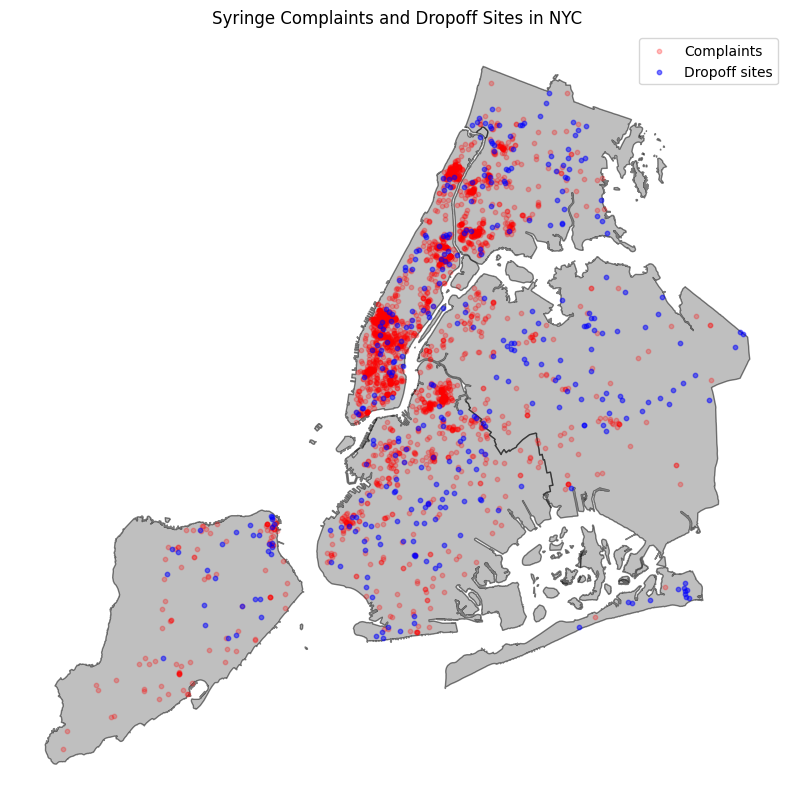

In [ ]:
# Load map of NYC for plotting
# CRS = 2263 (NAD83 / New York Long Island (ftUS))
nyc = gpd.read_file(geodatasets.get_path('nybb'))

# Make GeoDataFrames from the syringe_complaints and dropoff_sites DataFrames into
# Not projecting
syringe_complaints_geo = gpd.GeoDataFrame(syringe_complaints, geometry = gpd.points_from_xy(syringe_complaints.longitude, syringe_complaints.latitude), crs = 'EPSG:4326')
dropoff_sites_geo = gpd.GeoDataFrame(dropoff_sites, geometry = gpd.points_from_xy(dropoff_sites.longitude, dropoff_sites.latitude), crs = 'EPSG:4326')

# Change CRS to 2263, projecting coord
syringe_complaints_geo = syringe_complaints_geo.to_crs(2263)
dropoff_sites_geo = dropoff_sites_geo.to_crs(2263)

# Plot the map of NYC
ax = nyc.plot(figsize = (10, 10), alpha = 0.5, color = 'gray', edgecolor = 'k')

# Plot the syringe complaints and dropoff locations
syringe_complaints_geo.plot(ax = ax, markersize = 10, alpha = 0.25, color = 'red')
dropoff_sites_geo.plot(ax = ax, markersize = 10, alpha = 0.5, color = 'blue')

# Format the plot
ax.set_axis_off()
ax.legend(['Complaints', 'Dropoff sites'])
plt.title('Syringe Complaints and Dropoff Sites in NYC')
plt.show()

In [ ]:
# Load city council districts shape file
ccd = gpd.read_file('/Districts 2022-10-06.shp').to_crs(epsg=2263)

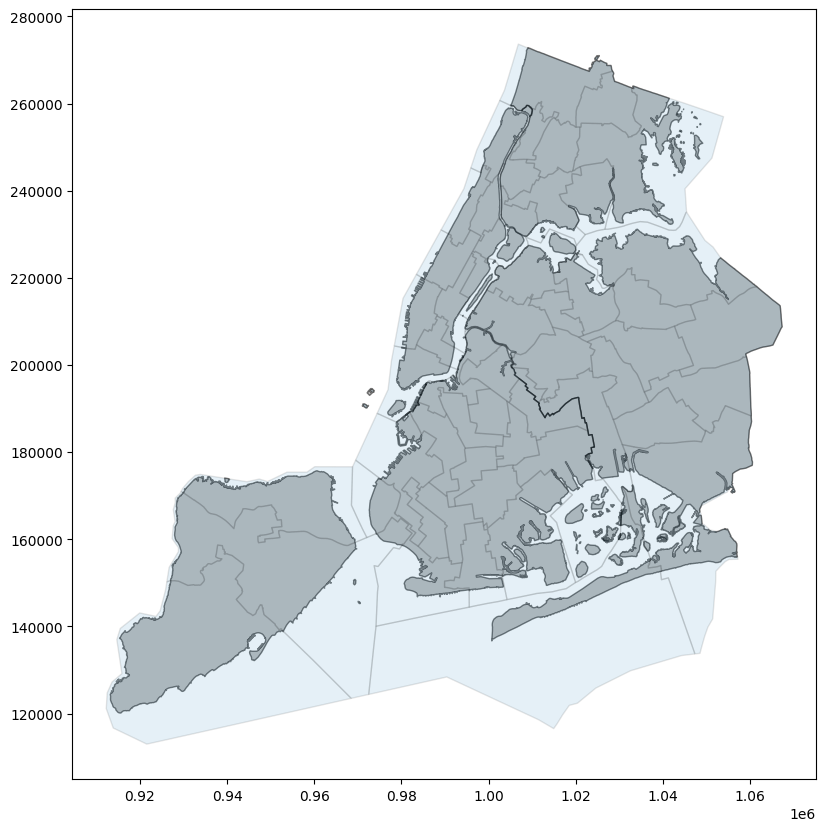

In [ ]:
# Try plotting this?
ax = nyc.plot(figsize = (10, 10), alpha = 0.5, color = 'gray', edgecolor = 'k')
ccd.plot(ax = ax, edgecolor = 'k', alpha = 0.1)
plt.show()

# Looking at other 311 complaints and their distribution in NYC

In [ ]:
all_complaints_10k = pd.read_csv('https://data.cityofnewyork.us/resource/erm2-nwe9.csv?$limit=10000')

In [ ]:
all_complaints_10k.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,64493126,2025-03-29T01:49:52.000,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11102.0,24-34 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.772895,-73.917798,"\n, \n(40.772895123556644, -73.91779840809791)"
1,64489698,2025-03-29T01:49:48.000,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10003.0,45 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.725333,-73.990057,"\n, \n(40.72533283110231, -73.99005683996256)"
2,64490846,2025-03-29T01:49:22.000,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11237.0,24 WYCKOFF AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.706366,-73.922544,"\n, \n(40.70636560745412, -73.92254403726173)"
3,64490971,2025-03-29T01:49:16.000,NaN,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,10301.0,137 BENZIGER AVENUE,...,SUV,NaN,NaN,NaN,NaN,NaN,NaN,40.639762,-74.083223,"\n, \n(40.639762323003076, -74.08322303866501)"
4,64493342,2025-03-29T01:48:38.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10467.0,316 EAST 211 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.880094,-73.873414,"\n, \n(40.880093772136696, -73.87341414442069)"


Extracting 'nybb_16a/nybb.shp' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.shx' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.dbf' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.prj' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'


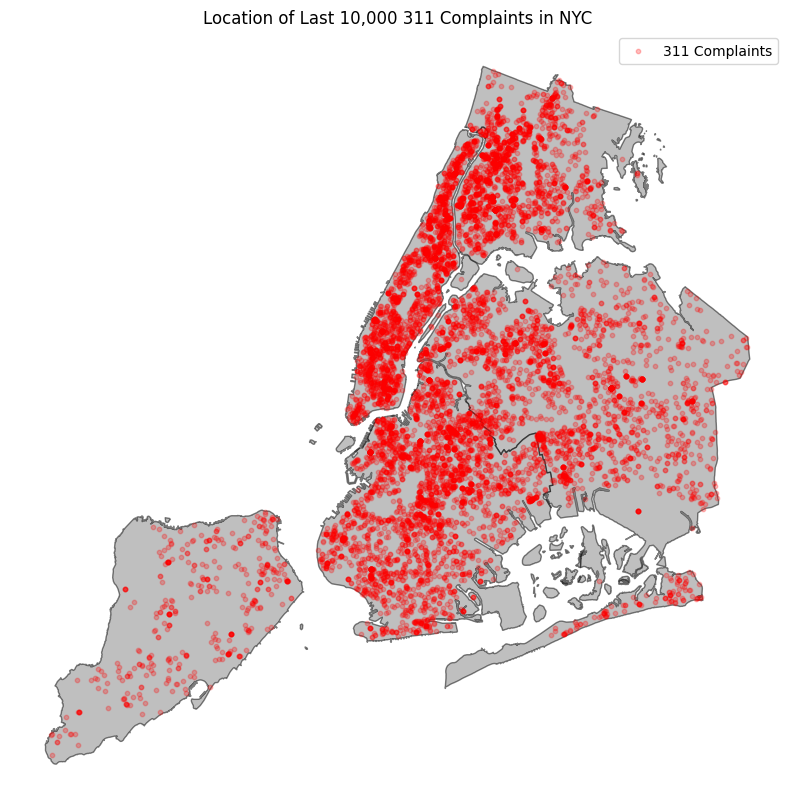

In [ ]:
# Load map of NYC for plotting
# CRS = 2263 (NAD83 / New York Long Island (ftUS))
nyc = gpd.read_file(geodatasets.get_path('nybb'))

# Make GeoDataFrames from the syringe_complaints and dropoff_sites DataFrames into
# Not projecting
all_complaints_10k_geo = gpd.GeoDataFrame(all_complaints_10k, geometry = gpd.points_from_xy(all_complaints_10k.longitude, all_complaints_10k.latitude), crs = 'EPSG:4326')

# Change CRS to 2263, projecting coord
all_complaints_10k_geo = all_complaints_10k_geo.to_crs(2263)

# Plot the map of NYC
ax = nyc.plot(figsize = (10, 10), alpha = 0.5, color = 'gray', edgecolor = 'k')

# Plot the syringe complaints and dropoff locations
all_complaints_10k_geo.plot(ax = ax, markersize = 10, alpha = 0.25, color = 'red')

# Format the plot
ax.set_axis_off()
ax.legend(['311 Complaints', 'Dropoff sites'])
plt.title('Location of Last 10,000 311 Complaints in NYC')
plt.show()

# Testing code below, work in progress!

## Using an LLM to parse the dropoff site opening hours

In [ ]:
from google import genai
from google.genai import types
from IPython.display import HTML, Markdown, display

In [ ]:
from google.api_core import retry


is_retriable = lambda e: (isinstance(e, genai.errors.APIError) and e.code in {429, 503})

genai.models.Models.generate_content = retry.Retry(
    predicate=is_retriable)(genai.models.Models.generate_content)

In [ ]:
GOOGLE_API_KEY = ''

In [ ]:
client = genai.Client(api_key=GOOGLE_API_KEY)

In [ ]:
dropoff_sites['days_hours']

,days_hours
0,24/7
1,10am-2pm
2,9am-5pm
3,24/7
4,First and Last Friday of every month 2pm-4pm
...,...
341,Monday-Wednesday 9
342,Call for mobbile unit locations and hours
343,NaN
344,NaN


In [ ]:
response = client.models.generate_content(
    model="gemini-2.0-flash-lite",
      contents = f"If a site has opening hours of {dropoff_sites.loc[341, 'days_hours']}, how many hours per month is it open? Assume there are 30 days in a month. Reply with only a number, or if one is not clear, just respond \'\'.")

print(response.text)

27



In [ ]:
for i in range(len(dropoff_sites)):
  response = client.models.generate_content(
      model = 'gemini-2.0-flash-lite',
      contents = f"If a site has opening hours of {dropoff_sites.loc[i, 'days_hours']}, how many hours per month is it open? Assume there are 30 days in a month. Reply with only a number, or if one is not clear, just respond \'\'.")
  dropoff_sites.loc[i, 'hours_per_month'] = response.text
  if i % 50 == 0:
    print(i)

0
50
100
150
200
250
300


In [ ]:
dropoff_sites.hours_per_month = dropoff_sites.hours_per_month.str.replace('hours', '')

In [ ]:
dropoff_sites.hours_per_month = dropoff_sites.hours_per_month.str.replace('\n', '')

In [ ]:
dropoff_sites.hours_per_month = dropoff_sites.hours_per_month.str.strip()

In [ ]:
dropoff_sites.hours_per_month

,hours_per_month
0,4
1,4
2,4
3,4
4,4
...,...
341,4
342,4
343,4
344,4


## Understanding whether there are more syringes or just more 311 complaints

In [24]:
# Download all of the 311 complaints in 2024
total_complaints_2024 = pd.read_csv('https://data.cityofnewyork.us/resource/erm2-nwe9.csv?$query=SELECT%20unique_key,created_date,complaint_type,descriptor,longitude,latitude%20WHERE%20date_extract_y(created_date)=2024%20LIMIT%2050000000')
total_complaints_2024.head(2)

,unique_key,created_date,complaint_type,descriptor,longitude,latitude
0,60615715,2024-03-18T09:23:08.000,Illegal Parking,Blocked Bike Lane,-73.964879,40.763282
1,60905389,2024-04-18T20:51:32.000,Curb Condition,Broken Curb,-73.926408,40.588068


In [28]:
# Turn total_complaints_2024 into a GeoDataFrame
total_complaints_2024 = gpd.GeoDataFrame(total_complaints_2024, geometry = gpd.points_from_xy(total_complaints_2024.longitude, total_complaints_2024.latitude), crs = 'EPSG:4326').to_crs(2263)

In [60]:
# Upload city council districts shape file
from google.colab import files
uploaded = files.upload()

Saving Districts 2022-10-06.dbf to Districts 2022-10-06.dbf
Saving Districts 2022-10-06.key to Districts 2022-10-06.key
Saving Districts 2022-10-06.prj to Districts 2022-10-06.prj
Saving Districts 2022-10-06.shp to Districts 2022-10-06.shp
Saving Districts 2022-10-06.shx to Districts 2022-10-06.shx


In [30]:
# Load city council districts shape file
ccd = gpd.read_file('/content/Districts 2022-10-06.shp')
ccd = ccd.to_crs(2263)

In [31]:
# Perform a spatial join to match each 311 complaint with its city council district
total_complaints_2024 = total_complaints_2024.sjoin(ccd[['DISTRICT', 'geometry']], how="left")

In [40]:
# Group by city council district and count the total complaints and syringe complaints
ccd_complaints = total_complaints_2024.groupby('DISTRICT').agg(total_complaints=('unique_key', 'count'),
                                              syringe_complaints=('descriptor', lambda x: (x == 'Syringes').sum()))

# For each city council district, calculate the normalizd syringe complaints
ccd_complaints['normalized_syringe_complaints'] = ccd_complaints['syringe_complaints'] / ccd_complaints['total_complaints']

In [41]:
ccd_complaints.head()

,total_complaints,syringe_complaints,normalized_syringe_complaints
DISTRICT,,,
01,78059,26,0.000333
02,79397,56,0.000705
03,91235,139,0.001524
04,59454,45,0.000757
05,31488,14,0.000445


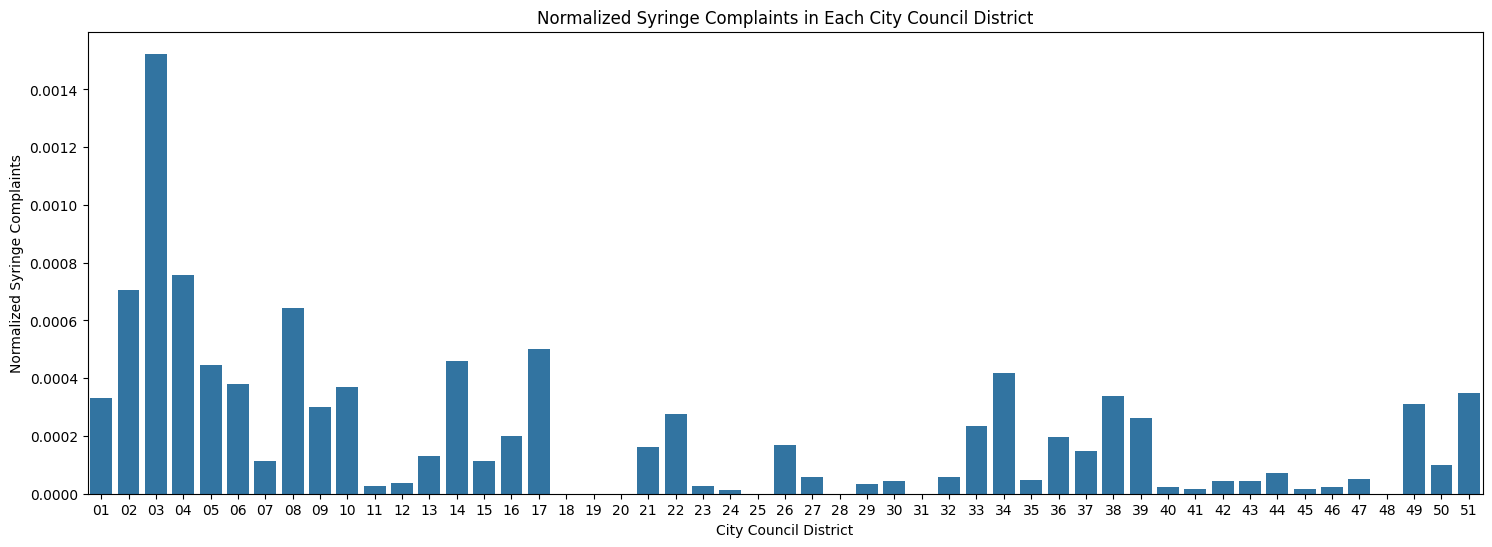

In [50]:
# Plot the normalized syringe complaints in each city council district
plt.figure(figsize=(18, 6))
sns.barplot(data = ccd_complaints['normalized_syringe_complaints'])
plt.xlabel('City Council District')
plt.ylabel('Normalized Syringe Complaints')
plt.title('Normalized Syringe Complaints in Each City Council District')
plt.show()

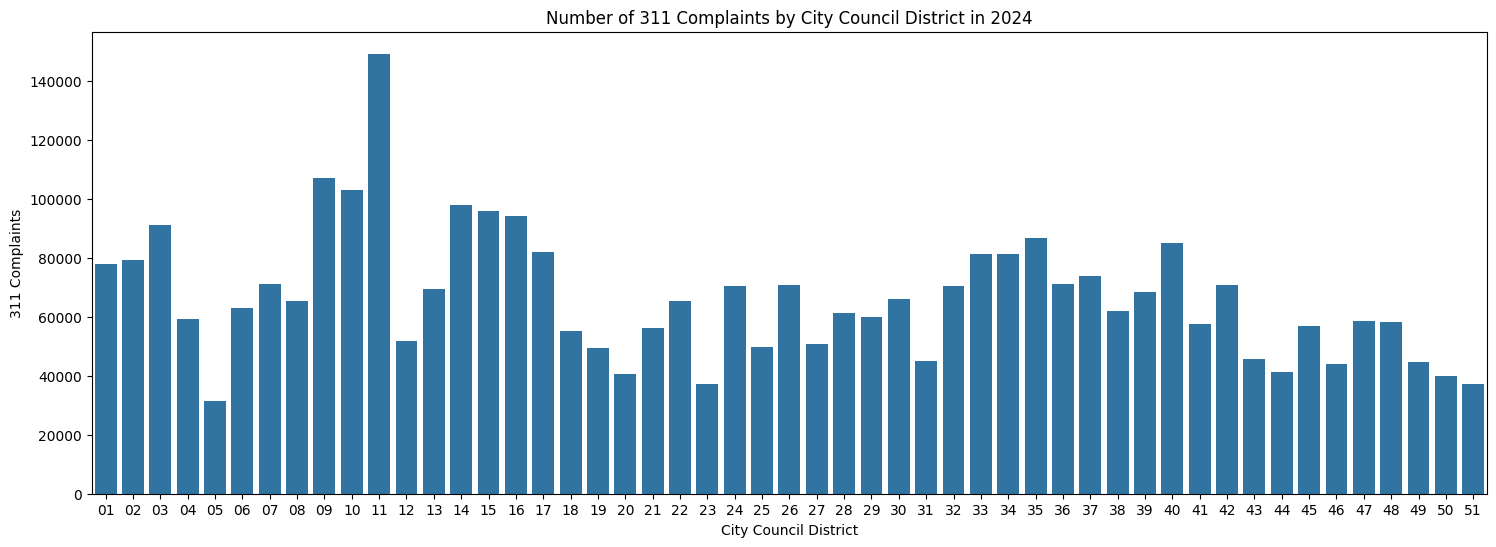

In [52]:
# Plot the normalized syringe complaints in each city council district
plt.figure(figsize=(18, 6))
sns.barplot(data = ccd_complaints['total_complaints'])
plt.xlabel('City Council District')
plt.ylabel('311 Complaints')
plt.title('Number of 311 Complaints by City Council District in 2024')
plt.show()